In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from numpy import genfromtxt
from dynamical_networks.simulate.PG_network import PG_network

### Set simulation parameters

In [2]:
t = np.linspace(0,5, 2000) #the time which the simulation will be solved for.
K_0 = 5 #the capacitance of the lines
P_gen = 1 #the amount of power generated by the generators.
P_con = 1 #the power consumed by the consumers.
I_0 = 1 #inertia of the power generators and consumers
damping = 0.1 #the damping in the power oscillations or losses in the transmission of power.
alpha = 0.6 #a factor of safety for for the capacity of the power lines

### Load data

the steady state may have not been solved for. in this case you just need to supply the function PG_network with ss = None. It can take several minutes to have a steady state solution for a large network.
    
    

In [3]:
A = genfromtxt('power_grid_data\\SpanishHeterogeneousCoupling_Matrix.csv', delimiter=',')
power_assignment = genfromtxt('power_grid_data\\SpanishHeterogeneousCoupling_Power.csv', delimiter=',')
V_gen = np.argwhere(power_assignment > 0).T[0] #vertices indices of generates
V_con = np.argwhere(power_assignment < 0).T[0] #vertices indices of consumers
theta_ss = np.load('theta_ss_spanish.npy')
omega_ss = np.zeros((len(theta_ss),))
ss = [theta_ss, omega_ss]
#cut = (16, 19) #high cost
cut = (56, 58) #highest cost?
#cut = (16, 18) #low cost

In [4]:
G = nx.convert_matrix.from_numpy_matrix(A) #create a graph from adjacency matrix

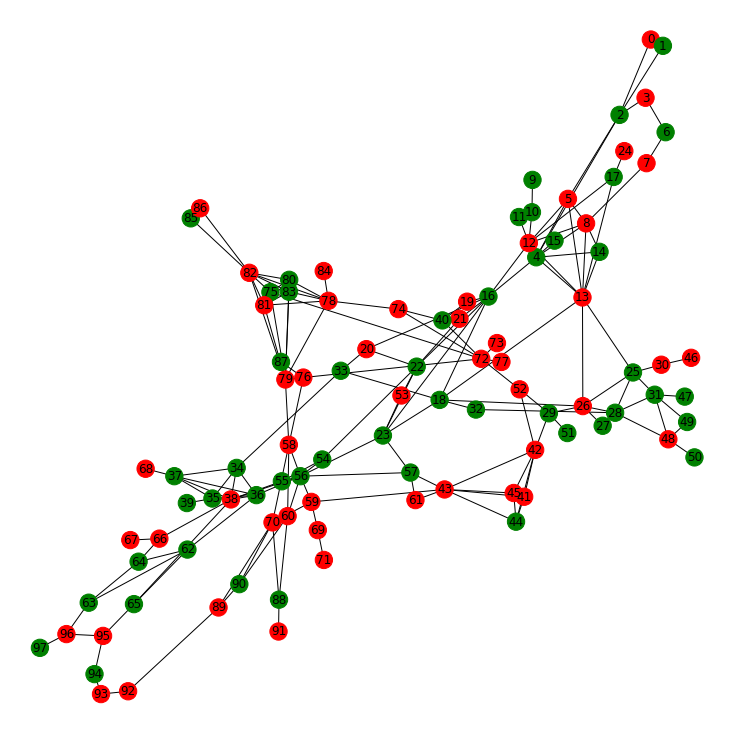

In [5]:
pos = nx.spring_layout(G, k = 0.2, iterations = 10000) #define positions for visualization purposes
color_map = [] #define colors based on generator or consumers
for node in G:
    if node in V_gen:
        color_map.append('green')
    else: 
        color_map.append('red') 
plt.figure(figsize = (10,10))
nx.draw(G, pos, node_color = color_map, width = 1, with_labels = True) #draw the graph
plt.show()

In [6]:
Fs, E = PG_network(A, t, V_gen, V_con, K_0, P_gen, P_con, alpha, I_0, damping, e_cut = cut, ss = ss)

0.25
0.5
0.75
1.0
1.25
1.5
1.75
2.0
2.25
2.5
2.75
3.0
3.25
3.5
3.75
4.0
4.25
4.5
4.75
5.0


(0,1)  -   0.666169999043798
(0,2)  -   0.33383936012020493
(1,2)  -   0.3338204130758944
(2,3)  -   0.6031885468787223
(2,4)  -   0.03313229724181019
(2,5)  -   0.36365008573019164
(3,6)  -   0.3968213620654796
(4,5)  -   0.33059754987650747
(4,8)  -   0.3813017220664417
(4,13)  -   0.24216810552558646
(4,14)  -   0.12574391373122942
(4,15)  -   0.9999879594373817
(4,16)  -   1.2047873344008553
(5,8)  -   0.050832493724231376
(5,12)  -   0.26802179933588827
(5,13)  -   0.08857139005316782
(6,7)  -   0.6031692741224709
(7,8)  -   0.39684140485540087
(8,12)  -   0.31876735736585443
(8,13)  -   0.13939133025832634
(8,14)  -   0.5065588636043103
(9,10)  -   0.9999928652443747
(10,11)  -   0.3384711806687011
(10,12)  -   1.6615121780125708
(11,12)  -   1.338464018876048
(12,13)  -   0.17953569721960438
(12,16)  -   1.1438527271582652
(12,17)  -   0.08979081338797854
(13,14)  -   0.3676878535542105
(13,17)  -   0.08977383509576185
(13,18)  -   0.1196039364040977
(13,25)  -   0.5908709603354

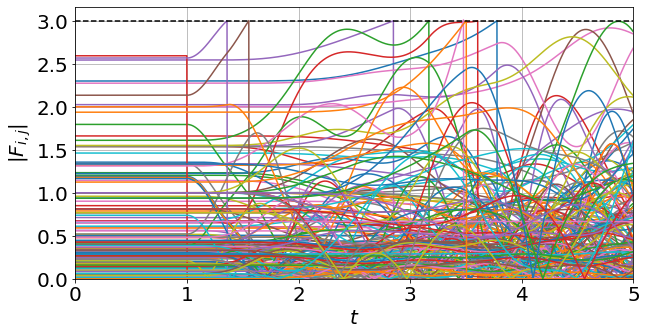

In [7]:
#---------------PLOTTING-------------------

plt.figure(figsize = (10,5))
TextSize = 20
for i in range(len(Fs)):
    plt.plot(t, Fs[i], label = '$('+str(E[i][0])+','+str(E[i][1])+')$')
    print('('+str(E[i][0])+','+str(E[i][1])+')  -  ', Fs[i][0])
plt.plot([0,max(t)], [alpha*K_0, alpha*K_0], 'k--')

plt.grid()
plt.xlim(0,max(t))
plt.ylim(0,)
plt.xticks(size = TextSize)
plt.yticks(size = TextSize)
plt.xlabel(r'$t$', size = TextSize)
plt.ylabel(r'$|F_{i,j}|$', size = TextSize)
#plt.legend(loc = 'upper right', fontsize = TextSize-12, ncol = 1)
plt.show()